# PS2

### Laurence Warner

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt
from scipy import integrate
import pandas as pd

## 1

## a

In [3]:
incomes = np.loadtxt('incomes.txt')
incomes[0:10]

array([  51253.49715631,  100630.32024137,   83009.27613739,
         82882.10654304,   77338.29483892,   81071.64131675,
         84760.04353269,   74599.0967193 ,   94687.36110452,
         76720.48678222])

Text(0,0.5,'Density')

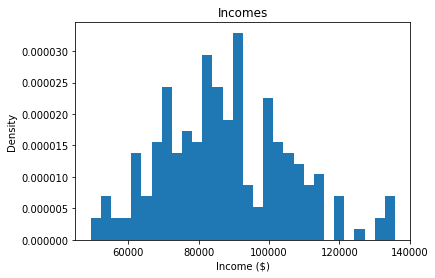

In [4]:
%matplotlib inline
count, bins, patches = plt.hist(incomes, bins = 30, normed = True)
plt.title('Incomes')
plt.xlabel('Income ($)')
plt.ylabel('Density')

### b

I couldn't quite figure out how to use sts.lognorm.pdf so I had to define the function myself.

In [5]:
def lognormal_pdf(x, params):
    mu, sigma = params
    pdf = 1/x/sigma/np.sqrt(2*np.pi) * np.exp(-(np.log(x)-mu)**2/2/sigma/sigma)
    return pdf

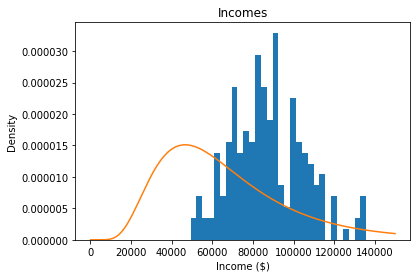

In [6]:
x = np.linspace(100, 150000, 1000)
PARAMS = (11.0, 0.5)
y = lognormal_pdf(x, PARAMS)
count, bins, patches = plt.hist(incomes, bins = 30, normed = True)
plt.title('Incomes')
plt.xlabel('Income ($)')
plt.ylabel('Density')
plt.plot(x, y)

In [7]:
def log_lik_log_norm(params, x):
    pdf = lognormal_pdf(x, params)
    log = np.log(pdf)
    s = log.sum()
    return s

In [8]:
ll = log_lik_log_norm(PARAMS, incomes)
print("The log likelihood value is", round(ll,0))

The log likelihood value is -2386.0


### c 

Grader: What does it mean when there is a star before args?

In [9]:
def crit(params, *args):
    xvals = args[0]
    neg_ll = -log_lik_log_norm(params, xvals)
    print("params are", params, "neg_ll is", neg_ll)
    return neg_ll

In [10]:
PARAMS_INIT = np.asarray((11.0, 0.5))

In [11]:
mle_arg = (incomes,)

In [12]:
results = opt.minimize(crit, PARAMS_INIT, args = (mle_arg), bounds = ((None, None),(0.1, None)))

params are [ 11.    0.5] neg_ll is 2385.85699781
params are [ 11.00000001   0.5       ] neg_ll is 2385.85699494
params are [ 11.           0.50000001] neg_ll is 2385.85699905
params are [ 11.99999903   0.49860733] neg_ll is 2499.09655013
params are [ 11.99999904   0.49860733] neg_ll is 2499.09655529
params are [ 11.99999903   0.49860734] neg_ll is 2499.09654682
params are [ 11.35913624   0.49949984] neg_ll is 2334.13256621
params are [ 11.35913625   0.49949984] neg_ll is 2334.13256621
params are [ 11.35913624   0.49949985] neg_ll is 2334.13256952
params are [ 11.55573126   0.22652005] neg_ll is 2318.47893496
params are [ 11.55573127   0.22652005] neg_ll is 2318.47894263
params are [ 11.55573126   0.22652006] neg_ll is 2318.47892967
params are [ 11.40520575   0.43553054] neg_ll is 2313.32566277
params are [ 11.40520576   0.43553054] neg_ll is 2313.32566326
params are [ 11.40520575   0.43553055] neg_ll is 2313.32566626
params are [ 11.49499868   0.31084957] neg_ll is 2285.88818359
params

In [13]:
results

      fun: 2241.7193013684946
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00645741,  0.01114131])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 10
   status: 0
  success: True
        x: array([ 11.3590244 ,   0.20817853])

In [14]:
def max_lik(params, data):
    def crit(params):
        neg_ll = -log_lik_log_norm(params, data)
        return neg_ll
    ndarray = np.array([params[0], params[1]])
    m = opt.minimize(crit, ndarray, method = 'L-BFGS-B', bounds = ((None, None),(0.1, None)))
    return m

In [15]:
opt.minimize?

In [16]:
PARAMS_INIT = (11.0, 0.5)

In [17]:
m = max_lik(PARAMS_INIT, incomes)

In [18]:
m

      fun: 2241.7193013684946
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00645741,  0.01114131])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 10
   status: 0
  success: True
        x: array([ 11.3590244 ,   0.20817853])

In [19]:
ml_params = m.x
ml_mu = ml_params[0]
ml_sig = ml_params[1]
print("ML estimates. Mu: {:.3f}, Sigma: {:.3f}".format(ml_mu , ml_sig))

ML estimates. Mu: 11.359, Sigma: 0.208


In [20]:
math.exp(ml_mu)

85735.68362770695

In [21]:
math.exp(11)

59874.14171519782

Not sure how to get VCV matrix

In [22]:
lik_max = log_lik_log_norm(ml_params, incomes)
print("Value of the likelihood function is", lik_max)

Value of the likelihood function is -2241.71930137


Confirming this is indeed greater than part b

In [23]:
lik_max > ll

True

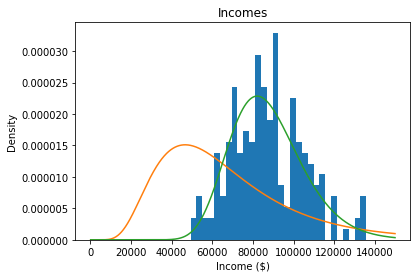

In [24]:
x = np.linspace(100, 150000, 1000)
PARAMS = (11.0, 0.5)
y = lognormal_pdf(x, PARAMS)
y_max = lognormal_pdf(x, ml_params)
count, bins, patches = plt.hist(incomes, bins = 30, normed = True)
plt.title('Incomes')
plt.xlabel('Income ($)')
plt.ylabel('Density')
plt.plot(x, y)
plt.plot(x, y_max)

Sigma a lot smaller: looks more like normal.

VCV

In [25]:
h = m.hess_inv.todense()
h

array([[  2.52828885e-04,   2.76199438e-05],
       [  2.76199438e-05,   1.30459506e-04]])

In [26]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])
min_hess = h*OffDiagNeg
print("The estimated VCV matrix for the minimization problem is:")
min_hess

The estimated VCV matrix for the minimization problem is:


array([[  2.52828885e-04,  -2.76199438e-05],
       [ -2.76199438e-05,   1.30459506e-04]])

In [27]:
se_mu = np.sqrt(min_hess[0,0])
se_sig = np.sqrt(min_hess[1,1])
print("se(mu) = {:.2f} \nse(sig) = {:.2f}".format(se_mu, se_sig))

se(mu) = 0.02 
se(sig) = 0.01


### d

Likelihood ratio test

In [28]:
mle = (ml_mu, ml_sig)
mle

(11.359024396310758, 0.20817852814050342)

In [29]:
PARAMS_INIT

(11.0, 0.5)

In [30]:
ll_mle = log_lik_log_norm(mle, incomes)
ll_mle

-2241.7193013684946

In [31]:
ll_h = log_lik_log_norm(PARAMS_INIT, incomes)
ll_h

-2385.8569978085579

In [32]:
lr = 2* (ll_mle - ll_h)
lr

288.27539288012667

In [33]:
p = 1- sts.chi2.cdf(lr, 2)
p

0.0

Therefore highly unlikely data came from mu = 11, sig = 0.5

### e

In [34]:
y_max = lognormal_pdf(x, ml_params)
y_max.shape

(1000,)

In [35]:
integrate.quad?

In [36]:
def lognormal_cdf(params, a, b):
    area, error = integrate.quad(lognormal_pdf, a, b, args=(params))
    return area

In [37]:
P = 100000
p = 1 - lognormal_cdf(ml_params, 0, P)

In [38]:
Q = 75000
q = lognormal_cdf(ml_params, 0, Q)

More than $100000:

In [39]:
round(p, 3)

0.23

Less than $75000:

In [40]:
round(q,3)

0.26

### 2

In [41]:
sick = pd.read_csv("sick.txt")

In [42]:
sick

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
5,0.62,44.67,1.20,68.60
6,1.06,27.92,1.84,29.42
7,1.29,44.87,2.40,50.49
8,1.05,53.68,1.65,55.12
9,1.18,39.63,1.96,37.30


In [43]:
def get_z(sick, params):
    assert len(params) == 5
    z_series = sick['sick'] - (params[0] + params [1] * sick['age'] + params[2] * sick['children'] + params[3] * sick['avgtemp_winter'])
    return z_series

In [44]:
params_mle = [  2.51644553e-01  , 1.29335605e-02  , 4.00500112e-01  ,-9.99175290e-03 ,
   9.10293751e-06]

In [45]:
z = get_z(sick, params_mle)

In [46]:
z

0     -0.001903
1     -0.003377
2     -0.004536
3     -0.001015
4     -0.004305
5     -0.004553
6      0.004288
7      0.001310
8     -0.005998
9      0.003511
10    -0.001393
11    -0.002255
12     0.005576
13     0.002689
14     0.000721
15    -0.002388
16    -0.000761
17     0.002727
18     0.001922
19    -0.003125
20     0.002721
21    -0.002530
22     0.003598
23     0.004059
24    -0.003981
25     0.001675
26     0.002187
27    -0.003216
28    -0.002480
29    -0.001494
         ...   
170    0.004159
171    0.005612
172   -0.002594
173    0.001200
174   -0.001383
175   -0.002632
176    0.000743
177    0.002214
178    0.000230
179    0.004625
180   -0.001909
181   -0.006467
182   -0.004581
183   -0.004303
184    0.003853
185   -0.000431
186    0.001203
187   -0.003407
188    0.001098
189    0.001719
190   -0.003388
191    0.000350
192    0.002422
193   -0.002746
194    0.002959
195    0.003991
196   -0.001020
197   -0.002784
198   -0.001369
199    0.002789
Length: 200, dtype: floa

In [47]:
def pdf_z(z, params):
    '''
    Takes z series and params tuple. Returns np.ndarray.
    '''
    MU = 0
    sig = math.sqrt(params[4])
    p = sts.norm.pdf(z, MU, sig)
    return p

In [48]:
pdf = pdf_z(z, params_mle)
pdf

array([ 108.38060035,   70.66515134,   42.69974472,  124.95105416,
         47.76715665,   42.35524601,   48.1711341 ,  120.33367837,
         18.33027871,   67.19330159,  118.86225019,   99.99950853,
         23.96121353,   88.88205029,  128.50545785,   96.67633212,
        128.08741424,   87.89590868,  107.93730254,   77.34012711,
         88.05063645,   93.03256852,   64.94990247,   53.50045062,
         55.35700793,  113.35161137,  101.67127271,   74.93061793,
         94.314587  ,  116.96432624,  119.74180533,   96.1340962 ,
        129.62578617,  105.53798145,  118.46078373,   16.82018216,
         30.73927687,   63.79112386,  107.1967103 ,  112.9348759 ,
         32.01495993,  124.66489723,  128.44128397,   53.46657696,
         59.4179345 ,   89.83069948,  128.86817581,  120.18730021,
         76.88036994,   53.12420179,   81.73878185,   68.70006579,
         35.8619213 ,  121.93240984,   97.93893273,   63.83087408,
         19.12055248,  116.49702848,  132.22610498,   74.90835

In [49]:
def neg_log_lik(pdf):
    '''
    Takes array. Returns scalar
    '''
    log = np.log(pdf)
    s = np.sum(log)
    neg = -s
    return neg

In [50]:
nll = neg_log_lik(pdf)
nll

-876.86506266910055

In [51]:
def crit(params, *args):
    print("params:", params)
    sick = args[0]
    z = get_z(sick, params)
    pdf = pdf_z(z, params)
    nll = neg_log_lik(pdf)
    print("negloglik:", nll)
    return nll

In [56]:
a = (sick,)
P = np.array([0,0,0,0,1])
b = (None, None)
b = (b, b, b, b, (1e-10, None))

In [57]:
res = opt.minimize(crit, P, args = a)

params: [ 0.  0.  0.  0.  1.]
negloglik: 310.812006641
params: [  1.49011612e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00]
negloglik: 310.812003635
params: [  0.00000000e+00   1.49011612e-08   0.00000000e+00   0.00000000e+00
   1.00000000e+00]
negloglik: 310.811872114
params: [  0.00000000e+00   0.00000000e+00   1.49011612e-08   0.00000000e+00
   1.00000000e+00]
negloglik: 310.812000163
params: [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.49011612e-08
   1.00000000e+00]
negloglik: 310.811876013
params: [ 0.          0.          0.          0.          1.00000001]
negloglik: 310.812006238
params: [ 0.  0.  0.  0.  1.]
negloglik: 310.812006641
params: [ 0.01617866  0.72407508  0.03486739  0.70308826  1.00216744]
negloglik: inf
params: [ 0.01617866  0.72407508  0.03486739  0.70308826  1.00216744]
negloglik: inf
params: [ 0.01617868  0.72407508  0.03486739  0.70308826  1.00216744]
negloglik: inf
params: [ 0.01617866  0.7240751   0.03486739  0.70308826

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


ValueError: math domain error

Optimizer isn't working

In [54]:
res

      fun: -38.40717777160755
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([  301.09203735,  9011.35988869,   358.68992683,  7441.39813236,
         399.1953065 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 14
   status: 0
  success: True
        x: array([ 0.99093424,  0.05050629,  0.01806611, -0.04528853,  0.04837104])